## Archaeological illustration of Bayesian learning ##

This is the first of a series of posts on Bayesian learning. The learning mechanism which is built into Bayes' theorem can be used in all sorts of clever ways and has obvious uses in machine learning. Today we'll build our intuition of how the mechanism works. In the next post, we'll see how we can use that mechanism to build adaptive regression models.

---

Bayesian statistics work in the same way as deductive reasoning. Bayes' theorm _is_ a mathematical form of deductive reasoning. It took me a long time to understand this simple but profound idea. Let me say it again: Bayes' theorm gives us a mathematical way to do deductive reasoning: it allows us to take a piece of evidence, weigh it against our prior suspicions, and arrive at a new set of beliefs. And if we have more evidence, we can do it over and over again.

Let's do an example. It occured to me that _archaeology_ is an excellent illustration of how this works. 

---

__We are archaeologists__

We're excavating the site of a Roman village. Our job is to try and pinpoint what year(s) the village was likely inhabited. In probability terms, we want to work out `p(inhabited)` for a range of years. As we uncover relics like pottery and coins, we use that evidence to refine our beliefs about when the village was inhabited.

We've just arrived at the site. It's in the north-west of France. Before we start excavating, we already have some thoughts on when this village was inhabited. It's known from other digs in the area that there were Roman settlements active in the region from around 50BC (aroundabout when Caesar conquered Gaul) to 500AD, at which time the collapse of the western Roman empire and successive barbarian raids left a wasteland. We strongly believe that there could be nobody living here after 500AD.

This knowledge forms the basis of our Bayesian prior for `p(inhabited)`. It's the starting point for our deduction. We can represent it as a uniform probability distribution between 50BC and 500AD. (For the purpose of charts, let's represent the BC years as negative years).

Populating the interactive namespace from numpy and matplotlib


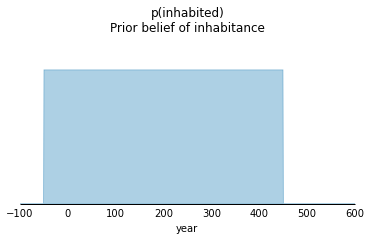

In [155]:
# prepare iPython
%pylab inline
from scipy import stats
from numpy import linspace

# specify range of inhabited and prior distribution
xrangex = linspace(-100,600,700)
p_Inhabited = stats.uniform(-50, 500).pdf(xrangex)


### Charts
# define function to make charts prettier
def formatchart(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
    ax.set_ylim(0.0)
    ax.set_xlim(-100,600)
    ax.set_xlabel("year")

# specify some colour schemes
priorColour = "#348ABD"
likelihoodColour = "red"
posteriorColour = "purple"

# Chart prior
fig = plt.figure(figsize(6,3), dpi=1600) # specifies the parameters of our graphs
gridsize = (1,1)

ax0 = plt.subplot2grid(gridsize,(0,0))
ax0.fill_between(xrangex,p_Inhabited,0,color=priorColour, alpha=0.4)
ax0.set_title("p(inhabited)\nPrior belief of inhabitance")
formatchart(ax0)


__Day 1: We unearth a shard of pottery__

A little poking around with our miniature pickaxe and hand-broom turns up a fragment of pottery:

Lab analysis shows it contains high traces of sulphur, which is a chemical composition consistent with a method of manufacture that was most popular with Romans and Greeks in 350AD. Though it was most popular in 350AD, but it was used before (as it replaced inferior methods) and continued to be used after (until it was superceded).

The popularity of this form of pottery amongst Roman potters could be called `p(pottery shard | inhabited)`, and represented with a distribution like this:


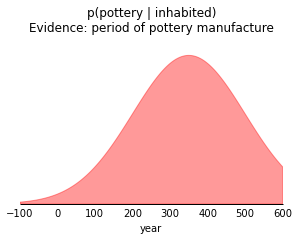

In [154]:
# specify likelihood: p(shard | inhabited)
p_ShardGivenInhabited = stats.norm(350, 150).pdf(xrangex)

ax0 = plt.subplot2grid(gridsize,(0,0))
ax0.fill_between(xrangex,p_ShardGivenInhabited,0,color=likelihoodColour, alpha=0.4)
ax0.set_title("p(pottery | inhabited)\nEvidence: period of pottery manufacture")
formatchart(ax0)


Now we have some hard evidence about when the village was inhabited. Let's combine the evidence with our prior knowledge. This is where we employ Bayes' theorem. Stated in terms of our archaeological problem:

$Pr(inhabited | pottery)=\frac{\Pr(pottery | inhabited)\Pr(inhabited)}{\Pr(pottery)}$

Let's look at each term:

* `p(inhabited)` is our _prior_ beliefs about the range of years which the village could have been inhabited. We specified it above.
* `p(pottery | inhabited)` is our knowledge of when this pottery could been made. We specified it above. This term is sometimes called the 'evidence' or the 'likelihood' by Bayesians.
* `p(inhabited | pottery)` is what we want to know. It is the _posterior_ distribution of probabilities for inhabitance that results from combining our prior beliefs with the evidence of the pottery.
* `p(pottery)` is simply a normalising constant to ensure the posterior distribution sums to 1. It can be overlooked.

Now let's do the math:


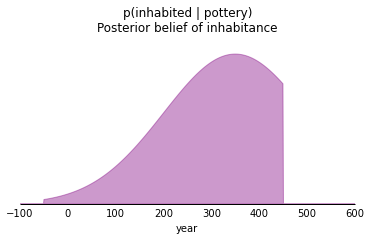

In [156]:
p_InhabitedGivenShard = p_ShardGivenInhabited * p_Inhabited / np.dot(p_ShardGivenInhabited,p_Inhabited)

ax0 = plt.subplot2grid(gridsize,(0,0))
ax0.fill_between(xrangex,p_InhabitedGivenShard,0,color=posteriorColour, alpha=0.4)
ax0.set_title('p(inhabited | pottery)\nPosterior belief of inhabitance')
formatchart(ax0)


Intuitively you can see that the shape of the posterior distribution is a compromise between our prior beliefs and the evidence of the pottery shard. 

__Day 2: We find the head of a statue of Jupiter__

The battered head of a marble statue of Jupiter. When would we expect to find these in ancient Rome? Well, it's a little more complicated. Worshipping Jupiter was at the heigh of popularity in 100AD, though it rapidly fell of when Emperor Nero banned worship of any deity other than himself. There was a brief resurgence in popularity around 450AD. 

So we have a bimodal distribution for `p(statue | inhabited)`. That's our new evidence. This time around, our `prior` distribution is the `posterior` from day 1. That is, `p(inhabited | pottery)`. 



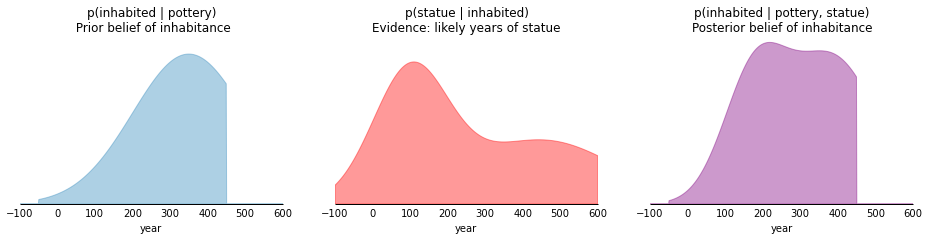

In [157]:
## Specify bimodal likelihood as sum of two normal distributions
# define p(coin | inhabited)
p_StatueEra1 = stats.norm(100, 100).pdf(xrangex)
p_StatueEra2 = stats.norm(450, 200).pdf(xrangex)
p_StatueGivenInhabited = (p_StatueEra1 + p_StatueEra2)  / (sum(p_StatueEra1) + sum(p_StatueEra2))

# perform Bayes calculation of posterior
p_InhabitedGivenShardStatue = (p_StatueGivenInhabited * p_InhabitedGivenShard) / np.dot(p_StatueGivenInhabited,p_InhabitedGivenShard)


## Charts
fig = plt.figure(figsize(16,3), dpi=1600)
gridsize = (1,3)

ax0 = plt.subplot2grid(gridsize,(0,0))
ax0.fill_between(xrangex,p_InhabitedGivenShard,0,color=priorColour, alpha=0.4)
ax0.set_title('p(inhabited | pottery)\n Prior belief of inhabitance')
formatchart(ax0)

ax1 = plt.subplot2grid(gridsize,(0,1))
ax1.fill_between(xrangex,p_StatueGivenInhabited,0,color=likelihoodColour, alpha=0.4)
ax1.set_title("p(statue | inhabited)\nEvidence: likely years of statue")
formatchart(ax1)

ax2 = plt.subplot2grid(gridsize,(0,2))
ax2.fill_between(xrangex,p_InhabitedGivenShardStatue,0,color=posteriorColour, alpha=0.4)
ax2.set_title("p(inhabited | pottery, statue)\nPosterior belief of inhabitance")
formatchart(ax2)


__Last day: We find a coin__

The coins introduced by Emperor Augustus spread quickly. They had a high silver content, and as later emperors successiely debased the Roman currency, Augustan coins soon disappeared into hoards or were melted down for their silver content. Hence it's pretty rare to find any after about 350AD. 

The probability distribution for `p(coin | inhabited)` can be represented with a gamma distribution, which peaks almost immediately after commencing at 35AD and then deteriorates over the next few hundred years. Let's combine the evidence of the coin with our distribution from Day 2, `p(inhabited | pottery, statue)`:

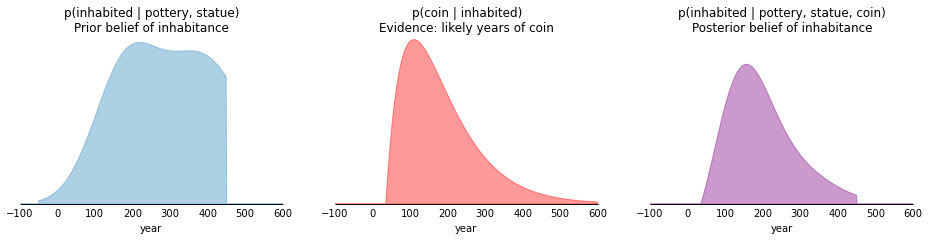

In [158]:
## Specify likelihood: p(coin | inhabited)
p_CoinGivenInhabited = stats.gamma(loc=35,scale=75,a=2).pdf(xrangex)

# use Bayes to find posterior
p_InhabitedGivenShardStatueCoin = p_CoinGivenInhabited * p_InhabitedGivenShardStatue / \
                                  np.dot(p_CoinGivenInhabited,p_InhabitedGivenShardStatue)

## Charts
fig = plt.figure(figsize(16,3), dpi=1600) # specifies the parameters of our graphs
gridsize = (1,3)

ax0 = plt.subplot2grid(gridsize,(0,0))
ax0.fill_between(xrangex,p_InhabitedGivenShardStatue,0,color=priorColour, alpha=0.4)
ax0.set_title("p(inhabited | pottery, statue)\nPrior belief of inhabitance")
formatchart(ax0)

ax1 = plt.subplot2grid(gridsize,(0,1))
ax1.fill_between(xrangex,p_CoinGivenInhabited,0,color=likelihoodColour, alpha=0.4)
ax1.set_title("p(coin | inhabited)\nEvidence: likely years of coin")
formatchart(ax1)

ax2 = plt.subplot2grid(gridsize,(0,2))
ax2.fill_between(xrangex,p_InhabitedGivenShardStatueCoin,0,color=posteriorColour, alpha=0.4)
ax2.set_title("p(inhabited | pottery, statue, coin)\nPosterior belief of inhabitance")
formatchart(ax2)


The final posterior distribution represents the combination of our prior beliefs with all three pieces of archaeological evidence. The high point, or 'maximum a posteriori' - occurs at around 150AD. This is the time at which we are most confident that the village must have been inhabited. Intuitively this makes sense, since this year is strongly represented in both the statue & the coin evidence. 

The Bayesian method also, happily, delivers more than a point estimate of a single year. The final posterior distribution quantifies our belief of how likely the village was inhabited across the centuries. This is a very useful output, from which we can make further statements such as 95% credibility ranges or high likelihood periods.

---

__Concluding remarks__

This has been an extremely simple example of Bayesian reasoning, but one that has helped me to develop my intuition about how Bayes theorm can be used to 'learn' or 'adapt' to new evidence. I find the deductive reasoning analogy helpful.

This is one advantage of Bayesian modelling. Without getting into the Bayesian vs. Frequentist debate, let's agree that Bayesian methods offer _certain advantages_ in _certain circumstances_. I think the sensible position is a pragmatic one, and both camps have tools that are useful for machine learning. For the reader who is still scratching their head about _when_ to consider a Bayesian approach, let me point out three strengths:

* _Small-to-medium data_: With all the hubbub about _big data_, we lose sight of the fact that we are very often working with _small_ data. From a statistician's point-of-view, big data is a _luxury_: you can throw all sorts of techniques at it and you don't need to worry about robustness.  The typical student of machine learning will naturally be cavalier about modelling because they are used to working with sample sizes so large that they need only worry about _relative_ performance of their models. Sure enough, I've heard machine learning described as ['statistics minus any checking of models and assumptions'](http://stats.stackexchange.com/questions/6/the-two-cultures-statistics-vs-machine-learning). When we work with _small_ data, we worry about squeezing as much information as we can out of the few datapoints we have. This is where Bayesian approaches are advantageous, as they provide a means (the _prior_) to bring contextual expertise in to supplement the data.
* _Learning mechanim_: Where many Frequentist techniques require complete refitting to incorporate new observations, Bayes' theorem provides a convenient mechanism for updating models. This is something I'll explore in future posts.
* _Probability distributions for parameters_: Where Frequentist techniques typically return only point estimates of parameters, Bayesian methods work with probability distributions. This can be very useful, depending on the context. Here in the case of archaeology it is obviously useful. Another context where it can be useful is where there are cost/benefit decisions to be made.



